## Performance of the default MobilNetV2 model

We start from a public image classifier, **MobilNetV2**, that was designed to be run on mobile devices, while keeping reasonable accuracy.

MobileNetV2 was trained on 1.2 million images from the ImageNet dataset. The model classifies a given image into one of 1000 predefined classes. Contrary to images of dogs, images of mototaxis were not considered in the training of MobileNet. 

Here we test the response of MobileNet to a stock image of a mototaxi and a dog. The best guesses for the mototaxi are 'stopwatch, magnetic compass, passenger car, pencil sharpener, crash helmet, ...', which are incorrect, although a relative good tries when considering how that image may look to a human who has never seen a mototaxi before.

In contrast, MobilNet does an excellent job on the image of a dog, even recognizing the breed type, a samoyed.

In [2]:
import PIL
import torch
import torchvision
from torchvision.models import MobileNet_V2_Weights

----------------------------------------
Predictions by default MobileNet:


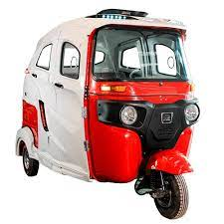

Prediction: stopwatch; with score = 8.717336654663086
Prediction: magnetic compass; with score = 8.226548194885254
Prediction: passenger car; with score = 7.893908500671387
Prediction: pencil sharpener; with score = 7.881326198577881
Prediction: crash helmet; with score = 7.738655090332031
----------------------------------------
Predictions by default MobileNet:


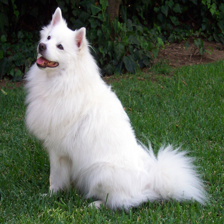

Prediction: Samoyed; with score = 14.712906837463379
Prediction: Arctic fox; with score = 12.248106956481934
Prediction: Pomeranian; with score = 11.285534858703613
Prediction: keeshond; with score = 10.877978324890137
Prediction: white wolf; with score = 10.405203819274902


In [5]:
file_imgs = ["../figures/mototaxi1.jpg", "../figures/dog.jpg"]
for file_img in file_imgs:
    input_img = PIL.Image.open(file_img)
    input_img = input_img.resize((224, 224))
    x = torchvision.transforms.functional.to_tensor(input_img)  #Tensor (3, 244, 244)
    x.unsqueeze_(0) #Tensor (1, 3, 244, 244)
    default_model = torchvision.models.mobilenet_v2(weights=MobileNet_V2_Weights.IMAGENET1K_V1)
    default_model.eval()
    prediction = default_model(x) 
    
    imagenet_classes_file = '../figures/imagenet_classes.txt'
    with open(imagenet_classes_file, "r") as f:
        categories = [s.strip() for s in f.readlines()]
    
    print('-'*40)    
    print('Predictions by default MobileNet:')
    display(input_img)
    top5_prob, top5_catid = torch.topk(prediction, 5)
    for i in range(top5_prob.size(1)):
        print(f'Prediction: {categories[top5_catid[0, i].item()]}; with score = { top5_prob[0, i].item()}') 